<a href="https://colab.research.google.com/github/ArdeshnaA/Netflix_Movies/blob/main/EDA_on_Carsale.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#importing the library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#importing the file
url = "/content/Canadasalesdata.csv"
data = pd.read_csv(url)

In [ ]:
data.head()

,Model,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Sumofsales,Category,Year
0,Acura MDX,93,389,782,611,550,501,0,0,0,0,0,0,2926,MLS,2021
1,Audi Q7,210,210,236,303,292,303,0,0,0,0,0,0,1554,MLS,2021
2,Audi Q8,130,130,146,211,203,211,0,0,0,0,0,0,1031,MLS,2021
3,BMW X5,323,323,364,518,498,518,0,0,0,0,0,0,2544,MLS,2021
4,BMW X6,72,72,81,113,108,113,0,0,0,0,0,0,559,MLS,2021


In [4]:
#Rename the columns
data = data.rename(columns={"Sumofsales" : "Total_Sales", "Category" : "Car_Size"})

In [ ]:
data.describe

<bound method NDFrame.describe of                   Model  Jan  Feb   Mar   Apr   May   Jun   Jul   Aug   Sep  \
0             Acura MDX   93  389   782   611   550   501     0     0     0   
1               Audi Q7  210  210   236   303   292   303     0     0     0   
2               Audi Q8  130  130   146   211   203   211     0     0     0   
3                BMW X5  323  323   364   518   498   518     0     0     0   
4                BMW X6   72   72    81   113   108   113     0     0     0   
..                  ...  ...  ...   ...   ...   ...   ...   ...   ...   ...   
231      Subaru Outback  499  621   948  1065  1079   981  1074   845   644   
232      Toyota 4Runner  605  393   784   762   854   681   824   903   522   
233   Toyota Highlander  729  792  1184  1095  1185  1423  1347  1336  1114   
234    Volkswagen Atlas  530  521   822   925   881   725   761   769   748   
235  Volkswagen Touareg    7    2     5     2     1     3     2     0     1   

      Oct   Nov  

In [ ]:
data.shape

(236, 16)

In [ ]:
data.columns

Index(['Model', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep',
       'Oct', 'Nov', 'Dec', 'Total_Sales', 'Car_Size', 'Year'],
      dtype='object')

In [5]:
data['Jan']=data['Jan'].astype(str).astype(int)
data['Feb']=data['Feb'].astype(str).astype(int)
data['Mar']=data['Mar'].astype(str).astype(int)
data['Apr']=data['Apr'].astype(str).astype(int)
data['May']=data['May'].astype(str).astype(int)
data['Jun']=data['Jun'].astype(str).astype(int)
data['Jul']=data['Jul'].astype(str).astype(int)
data['Aug']=data['Aug'].astype(str).astype(int)
data['Sep']=data['Sep'].astype(str).astype(int)
data['Oct']=data['Oct'].astype(str).astype(int)
data['Nov']=data['Nov'].astype(str).astype(int)
data['Dec']=data['Dec'].astype(str).astype(int)

In [ ]:
data.isnull().sum()

Model          0
Jan            0
Feb            0
Mar            0
Apr            0
May            0
Jun            0
Jul            0
Aug            0
Sep            0
Oct            0
Nov            0
Dec            0
Total_Sales    0
Car_Size       0
Year           0
dtype: int64

In [ ]:
data["Model"].unique()

array(['Acura MDX', 'Audi Q7', 'Audi Q8', 'BMW X5', 'BMW X6',
       'Cadillac XT5', 'Cadillac XT6', 'Genesis GV80', 'Infiniti QX60',
       'Jaguar F0Pace', 'Land Rover Defender',
       'Land Rover Discovery / LR4', 'Land Rover Range Rover Sport',
       'Land Rover Range Rover Velar', 'Lexus GX', 'Lexus RX',
       'Lincoln Aviator', 'Lincoln MKX/Nautilus', 'Maserati Levante',
       'Mercedes0Benz GLE0Class', 'Porsche Cayenne', 'Tesla Model X',
       'Volvo XC90', 'Alfa Romeo Stelvio', 'Audi eTron', 'Audi Q3',
       'Audi Q5', 'BMW X1', 'BMW X2', 'Cadillac XT4', 'Infiniti QX30',
       'Infiniti QX50', 'Jaguar E0Pace', 'Land Rover Discovery Sport',
       'Land Rover Range Rover Evoque', 'Lexus NX', 'Lexus UX',
       'Lincoln MKC', 'Mercedes0Benz GLA0Class',
       'Mercedes0Benz GLC/GLK0Class', 'Volvo XC40', 'Volvo XC60',
       'Infiniti QX55', 'Mercedes0Benz GLB', 'Tesla Model Y', 'BMW X7',
       'Cadillac Escalade', 'Infiniti QX80', 'Land Rover Range Rover',
       'Lexus L

In [ ]:
len(data["Model"].unique())

89

In [ ]:
data['Model'].value_counts()

Land Rover Range Rover Evoque    4
Volvo XC60                       4
Volvo XC40                       4
Mercedes0Benz GLC/GLK0Class      4
Mercedes0Benz GLA0Class          4
                                ..
Mercedes0Benz GLB                2
Chevrolet TrailBlazer            1
Ford Bronco Sport                1
Infiniti QX55                    1
Jeep Grand Wagoneer              1
Name: Model, Length: 89, dtype: int64

In [6]:
#For storing all the Land Rover Models
land_rover_sales = data.loc[data['Model'].str.contains("Land Rover", case=False) ]

In [ ]:
#For Volvo and Land Rover Models
data_rr_vol = data.loc[data['Model'].str.contains("Land Rover|Volvo", case=False) ]

In [ ]:
#Setting the index as Model
data_rr_vol = data_rr_vol.set_index('Model')

In [ ]:
data_rr_vol.head()

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Total_Sales,Car_Size,Year
Model,,,,,,,,,,,,,,,
Land Rover Defender,216,216,243,129,124,129,0,0,0,0,0,0,1057,MLS,2021
Land Rover Discovery / LR4,13,13,15,21,20,21,0,0,0,0,0,0,103,MLS,2021
Land Rover Range Rover Sport,263,263,296,282,271,282,0,0,0,0,0,0,1657,MLS,2021
Land Rover Range Rover Velar,105,105,118,149,143,149,0,0,0,0,0,0,769,MLS,2021
Volvo XC90,190,190,214,261,338,205,0,0,0,0,0,0,1398,MLS,2021


In [ ]:
#making models as the index
land_rover_sales = land_rover_sales.set_index('Model')

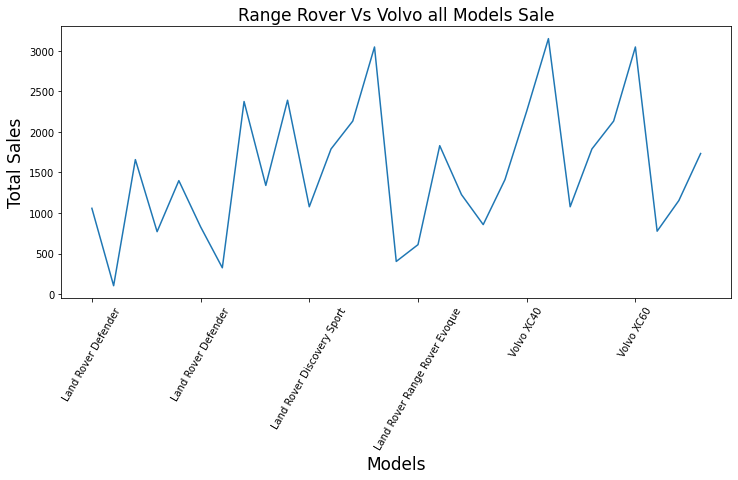

In [ ]:
#PLotting line graph for all LandRover and Volvo Models
data_rr_vol['Total_Sales'].plot(kind='line', figsize= (12,5))
plt.title("Range Rover Vs Volvo all Models Sale", fontsize=17)
plt.ylabel('Total Sales', fontsize=17)
plt.xlabel('Models', fontsize=17)
plt.xticks(rotation = 60)
plt.show()

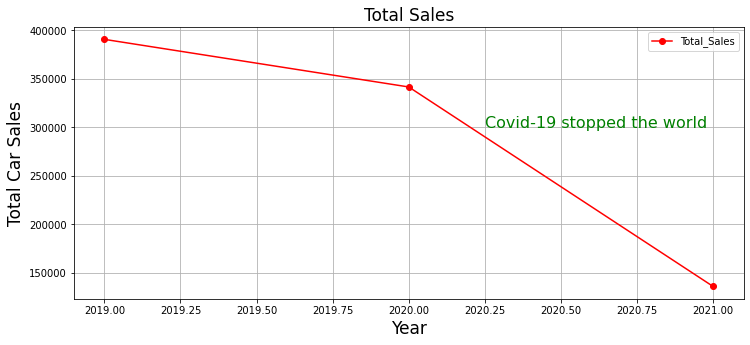

In [ ]:
#Plotting a line graph for Total car sales
gbm = data.groupby('Year')[["Total_Sales"]].sum().sort_values(by = 'Year', ascending = False)

gbm[:].plot.line(color = ["red"],figsize= (12,5), marker='o')       

plt.title('Total Sales', fontsize=17)
plt.xlabel('Year', fontsize=17)
plt.ylabel('Total Car Sales', fontsize=17)
plt.text(2020.25,300000,'Covid-19 stopped the world', fontdict={'size':16,'color':'g'})
plt.grid(True)
plt.show()

## MatplotLib Library

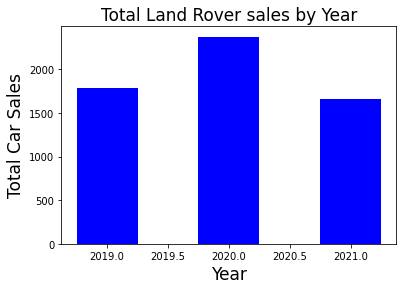

In [ ]:
x = land_rover_sales['Year']

y = land_rover_sales['Total_Sales']
plt.bar(x, y, color ='blue', width=0.5)
plt.title('Total Land Rover sales by Year',fontsize=17)
plt.xlabel('Year',fontsize=17)
plt.ylabel('Total Car Sales', fontsize=17)
plt.show()



## Seaborn Library

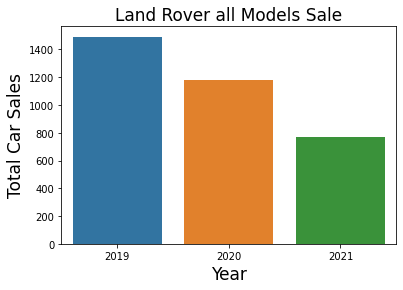

In [ ]:

sns.barplot(data=land_rover_sales,x='Year',y='Total_Sales',ci=None)
plt.title('Land Rover all Models Sale', fontsize=17)
plt.xlabel('Year', fontsize=17)
plt.ylabel('Total Car Sales', fontsize=17)
plt.show()

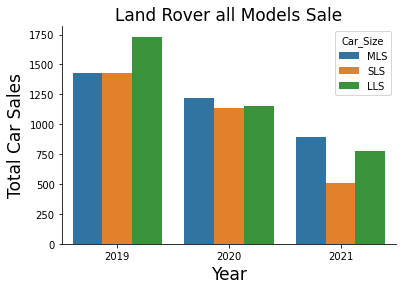

In [ ]:
#Showing Categorize Bar chart
sns.barplot(data=land_rover_sales,x='Year',y='Total_Sales',hue='Car_Size',ci=None)
sns.set_palette('Set1')
plt.title('Land Rover all Models Sale', fontsize=17)
plt.xlabel('Year', fontsize=17)
plt.ylabel('Total Car Sales', fontsize=17)
sns.despine()
plt.show()

## Plotly Library

In [7]:
#Assinging all months to a varible
month = land_rover_sales[['Jan','Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']]

In [8]:
import plotly.express as px

#land_rover_sales = px.data.gapminder().query('[month]')
fig = px.bar(land_rover_sales, x='Model', y = 'Total_Sales', title = 'Range Rover / Land Rover Models',
             color='Year', hover_data = month)
fig.show()

## HeatMap using Seaborn

In [ ]:
#Creating a pivot table using Category, Year and SumofSales
carsale = data.pivot_table(index = 'Category', columns = 'Year', values = 'Sumofsales')

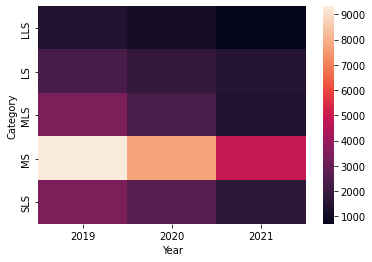

In [ ]:
#HeatMap
sns.heatmap(carsale)